Training and testing kNN model on dataset without one-hot-encoded columns and using p-values of f-statistics for feature selection

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load data
data_csv = "fulldataset_updated.csv"
data_df = pd.read_csv(data_csv)
data_df = data_df.rename(columns={"Unnamed: 0":"index"})
data_df.head()

,index,imdbid,title,metascore,script department,production companies,writers,directors,casting directors,cast,...,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,0,118661,The Avengers,12.0,"Sharon Mansfield, Anna Worley","Warner Bros., Jerry Weintraub Productions","Sydney Newman, Don MacPherson",Jeremiah S. Chechik,Susie Figgis,"Ralph Fiennes, Uma Thurman, Sean Connery, Patr...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,215545,Bamboozled,54.0,"Shari L. Carpenter, Carolyn De Sousa","New Line Cinema, 40 Acres & A Mule Filmworks",Spike Lee,Spike Lee,Aisha Coley,"Damon Wayans, Savion Glover, Jada Pinkett Smit...",...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,118715,The Big Lebowski,71.0,T. Kukovinski,"Polygram Filmed Entertainment, Working Title F...","Ethan Coen, Joel Coen","Joel Coen, Ethan Coen",John S. Lyons,"Jeff Bridges, John Goodman, Julianne Moore, St...",...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,112573,Braveheart,68.0,"Sally Jones, Kate Pakenham, Anna Worley","Icon Entertainment International, The Ladd Com...",Randall Wallace,Mel Gibson,Patsy Pollock,"James Robinson, Sean Lawlor, Sandy Nelson, Jam...",...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,88847,The Breakfast Club,66.0,Bob Forrest,"Universal Pictures, A&M Films, Channel Product...",John Hughes,John Hughes,Jackie Burch,"Emilio Estevez, Paul Gleason, Anthony Michael ...",...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Data preprocessing
# Drop unrelated columns
data_df = data_df.drop(["index", "imdbid", "title", "script department",
                        "production companies", "writers", "directors",
                        "casting directors", "cast"], axis=1)

# Drop rows with 0 locations
data_df = data_df[data_df["locations"] != 0]

In [5]:
data_df

,metascore,scenes,characters,percent dialogue,locations,Positive,Anger,Disgust,Fear,Negative,...,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,12.0,256.0,24.0,0.348611,109,596.0,235.0,158.0,402.0,590.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,54.0,284.0,98.0,0.645387,65,761.0,260.0,155.0,291.0,600.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.0,58.0,47.0,0.543055,2,563.0,277.0,155.0,239.0,541.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,178.0,76.0,0.314321,92,911.0,461.0,248.0,585.0,927.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66.0,48.0,15.0,0.698996,15,318.0,158.0,150.0,158.0,391.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,61.0,237.0,96.0,0.457791,3,567.0,152.0,115.0,194.0,407.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1499,58.0,234.0,69.0,0.509856,86,543.0,154.0,144.0,199.0,417.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1500,67.0,179.0,37.0,0.463576,90,560.0,144.0,111.0,200.0,370.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1501,73.0,109.0,37.0,0.403134,37,603.0,290.0,180.0,400.0,641.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [6]:
# Seeing columns
data_df.columns

Index(['metascore', 'scenes', 'characters', 'percent dialogue', 'locations',
       'Positive', 'Anger', 'Disgust', 'Fear', 'Negative', 'Sadness',
       'Anticipation', 'Joy', 'Surprise', 'Trust', 'Top 3', 'Action',
       'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Fantasy',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [7]:
# Getting features and label
X_df = data_df.loc[:, data_df.columns != "metascore"]
y_df = data_df["metascore"]

In [8]:
# Finding f-statistics and p-values of features
from sklearn.feature_selection import f_regression
f_reg_out = f_regression(X_df, y_df)
f_stats = f_reg_out[0]
p_vals = f_reg_out[1]
print(f_stats)
print(p_vals)

[3.93611096e-01 2.48643436e+01 5.55793101e+01 9.85077526e-01
 1.97894919e+01 3.83413625e+00 2.59736649e+00 1.21734357e+01
 1.54985742e+00 8.34645116e-02 1.94422401e+01 2.38843909e+01
 3.42330889e+00 2.07640432e+01 1.66694441e-01 6.41440978e+01
 7.82004721e+00 3.34669377e+01 4.17373389e-02 1.07192317e-01
 1.64477811e+02 1.79718167e+01 6.50358752e+01 1.11584655e-01
 3.91872938e-01 1.10687972e+01 3.64419949e+01]
[5.30503208e-01 6.86925257e-07 1.51370866e-13 3.21109171e-01
 9.28573555e-06 5.04047342e-02 1.07252669e-01 4.98824744e-04
 2.13351730e-01 7.72696260e-01 1.11101655e-05 1.13312339e-06
 6.44793756e-02 5.61784179e-06 6.83124935e-01 2.30624564e-15
 5.23317954e-03 8.81466370e-09 8.38149097e-01 7.43409438e-01
 8.52454736e-36 2.37940308e-05 1.49449998e-15 7.38394073e-01
 5.31412167e-01 8.99248738e-04 1.98066456e-09]


In [9]:
# Dropping columns with p-values greater than 0.05
feature_names = X_df.columns.tolist()

# Finding indices of features with p-values greater than 0.05
indices_to_drop = []
for i in range(len(p_vals)):
    if (p_vals[i] > 0.05):
        indices_to_drop.append(i)

features_to_drop = []
for i in indices_to_drop:
    features_to_drop.append(feature_names[i])
    
# Drop columns
X_df = X_df.drop(features_to_drop, axis=1)

In [10]:
# Getting values of features and labels
X = X_df.values
y = y_df.values
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (1496, 15)
Shape of y:  (1496,)


In [11]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Data preprocessing
# Normalization: Min-max normalization
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
minmaxscaler = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = minmaxscaler.transform(X_train)

# transform test data
X_test_norm = minmaxscaler.transform(X_test)

In [13]:
# import libraries for model selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [14]:
# hyperparameter values to try
Ks = np.arange(1,100)

In [15]:
# model selection
best_model_mae = None
best_model_r2 = None
best_neg_mae = -np.inf
best_r2 = -np.inf
maes = []
r2s = []

for K in Ks:
    model = KNeighborsRegressor(n_neighbors=K)
    validation_neg_mae = cross_val_score(estimator=model, X=X_train_norm, y=y_train,
                                   scoring="neg_mean_absolute_error", cv=10).mean()
    validation_r2 = cross_val_score(estimator=model, X=X_train_norm, y=y_train,
                                  scoring="r2", cv=10).mean()

    maes.append(abs(validation_neg_mae))
    r2s.append(validation_r2)

    if validation_neg_mae > best_neg_mae:
        best_neg_mae = validation_neg_mae
        best_model_mae = model

    if validation_r2 > best_r2:
        best_r2 = validation_r2
        best_model_r2 = model

print("Best model based on MAE: ", best_model_mae)
print("Best MAE = ", abs(best_neg_mae))
print("Best model based on R2: ", best_model_r2)
print("Best R2 = ", best_r2)

Best model based on MAE:  KNeighborsRegressor(n_neighbors=64)
Best MAE =  13.04423975840336
Best model based on R2:  KNeighborsRegressor(n_neighbors=48)
Best R2 =  0.13573052227971366


In [16]:
best_model_mae = KNeighborsRegressor(n_neighbors=64)
best_model_mae.fit(X_train_norm, y_train)
y_pred_mae = best_model_mae.predict(X_test_norm)
print("Best model based on MAE: \nMAE = ", mean_absolute_error(y_true=y_test, y_pred=y_pred_mae))
print("R2 = ", r2_score(y_true=y_test, y_pred=y_pred_mae))
print("MAPE = ", mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred_mae))

best_model_r2 = KNeighborsRegressor(n_neighbors=48)
best_model_r2.fit(X_train_norm, y_train)
y_pred_r2 = best_model_r2.predict(X_test_norm)
print("\nBest model based on R2: \nMAE = ", mean_absolute_error(y_true=y_test, y_pred=y_pred_r2))
print("R2 = ", r2_score(y_true=y_test, y_pred=y_pred_r2))
print("MAPE = ", mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred_r2))

Best model based on MAE: 
MAE =  12.91828125
R2 =  0.1551252840562639
MAPE =  0.2864027811609141

Best model based on R2: 
MAE =  12.950555555555557
R2 =  0.154299230109473
MAPE =  0.28558301680435405


Results of kNN on data without one-hot-encoding and feature selection using p-values of f-statistics:
- MAE =  12.91828125
- R2 =  0.1551252840562639
- MAPE =  0.2864027811609141

Plotting relevant plots:

In [17]:
import matplotlib.pyplot as plt
# From: https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
def annot_min_mae(x, y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = min(y)
    text = "Lowest MAE: k={:d}, MAE={:.3f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.94,0.96), **kw)

def annot_max_r2(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text = "Highest R2: k={:d}, R2={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

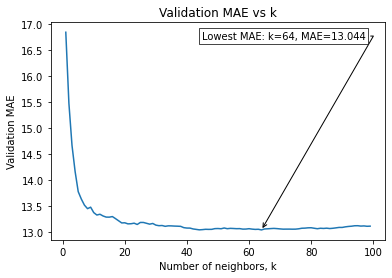

In [18]:
# Plot validation MAE
fig, ax = plt.subplots()
ax.plot(Ks, maes)
annot_min_mae(Ks, maes)
plt.xlabel("Number of neighbors, k")
plt.ylabel("Validation MAE")
plt.title("Validation MAE vs k")
plt.show()

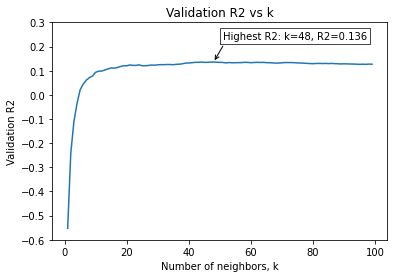

In [19]:
# Plot validation R2
fig, ax = plt.subplots()
ax.plot(Ks, r2s)
annot_max_r2(Ks, r2s)
ax.set_ylim(-0.6,0.3)
plt.xlabel("Number of neighbors, k")
plt.ylabel("Validation R2")
plt.title("Validation R2 vs k")
plt.show()

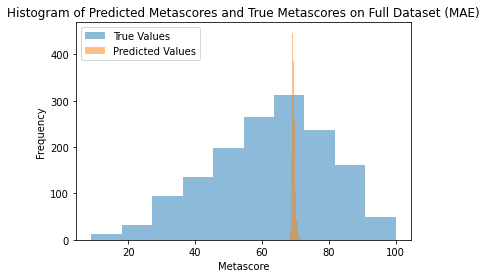

In [20]:
# Plot histogram of predicted and true metascores on full dataset, using best model based on MAE
full_pred_mae = best_model_mae.predict(X)
plt.hist(y, alpha=0.5, label='True Values')
plt.hist(full_pred_mae, alpha=0.5, label='Predicted Values')
plt.legend(loc='upper left')
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Metascores and True Metascores on Full Dataset (MAE)")
plt.show()

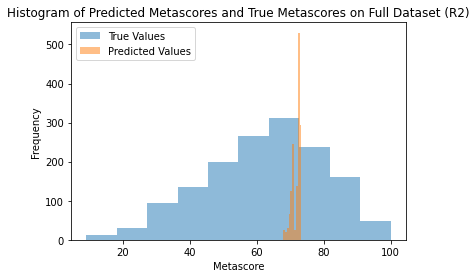

In [21]:
# Plot histogram of predicted and true metascores on full dataset, using best model based on R2
full_pred_r2 = best_model_r2.predict(X)
plt.hist(y, alpha=0.5, label='True Values')
plt.hist(full_pred_r2, alpha=0.5, label='Predicted Values')
plt.legend(loc='upper left')
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Metascores and True Metascores on Full Dataset (R2)")
plt.show()

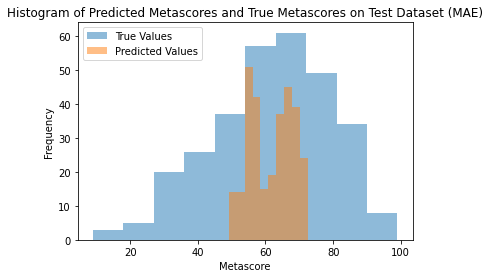

In [22]:
# Plot histogram of predicted and true metascores on test dataset, using best model based on MAE
plt.hist(y_test, alpha=0.5, label='True Values')
plt.hist(y_pred_mae, alpha=0.5, label='Predicted Values')
plt.legend(loc='upper left')
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Metascores and True Metascores on Test Dataset (MAE)")
plt.show()

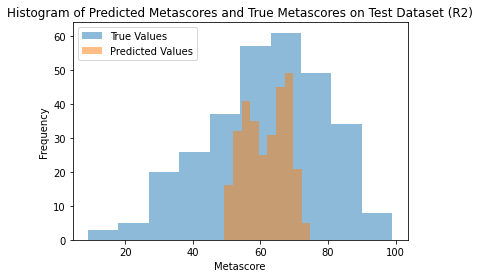

In [23]:
# Plot histogram of predicted and true metascores on test dataset, using best model based on R2
plt.hist(y_test, alpha=0.5, label='True Values')
plt.hist(y_pred_r2, alpha=0.5, label='Predicted Values')
plt.legend(loc='upper left')
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Metascores and True Metascores on Test Dataset (R2)")
plt.show()